In [107]:
import pandas as pd
import geopandas as gpd
import numpy as np
from scipy.stats import ks_2samp

import matplotlib.pyplot as plt

In [108]:
fake3 = gpd.read_file('fake3.geoJSON')

In [109]:
fake3.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 11115 entries, 0 to 11114
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   object_id  2223 non-null   float64 
 1   cluster    11115 non-null  int64   
 2   fake       11115 non-null  int64   
 3   geometry   11115 non-null  geometry
dtypes: float64(1), geometry(1), int64(2)
memory usage: 347.5 KB


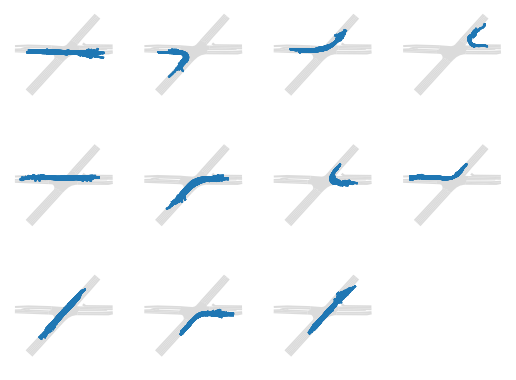

In [110]:
zones = gpd.read_file("C:/Users/anape/Downloads/outsight/resources/QGIS/lanes_and_int.geojson")
fig, axes = plt.subplots(3,4)
for i, group in fake3.groupby('cluster'): 
    ax=axes.ravel()[i]
    zones.plot(color='lightgray',alpha=0.8, ax=ax)
    group.plot(ax=ax)
    ax.axis('off')
plt.axis('off')
plt.show()

In [111]:
fake3['num_points'] = fake3['geometry'].apply(lambda x: len(x.xy[0]))
fake3['length'] = fake3['geometry'].apply(lambda x: x.length)

In [112]:
real = fake3[fake3['fake']==0]
fake = fake3[fake3['fake']==1]

## Testing for number of points

In [113]:
ks_statistic, p_value = ks_2samp(real['num_points'], fake['num_points'])
ks_statistic,p_value

(0.0, 1.0)

All clusters together

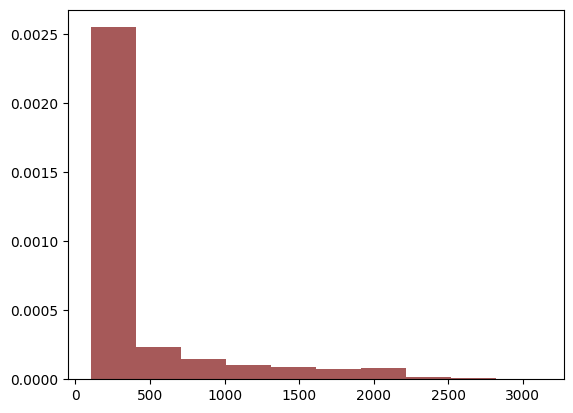

(419.7962213225371, 419.7962213225371)

In [114]:
fig, ax = plt.subplots()
ax.hist(real['num_points'],density=True, color = 'gray')
ax.hist(fake['num_points'], density = True, color='r', alpha=0.3)
plt.show()

np.mean(real['num_points']), np.mean(fake['num_points'])

Split by cluster.

cluster 0: KS=0.0, p_val=1.0, 163
cluster 1: KS=0.0, p_val=1.0, 207
cluster 2: KS=0.0, p_val=1.0, 170
cluster 3: KS=0.0, p_val=1.0, 146
cluster 4: KS=0.0, p_val=1.0, 123
cluster 5: KS=0.0, p_val=1.0, 197
cluster 6: KS=0.0, p_val=1.0, 131
cluster 7: KS=0.0, p_val=1.0, 150
cluster 8: KS=0.0, p_val=1.0, 330
cluster 9: KS=0.0, p_val=1.0, 257
cluster 10: KS=0.0, p_val=1.0, 349


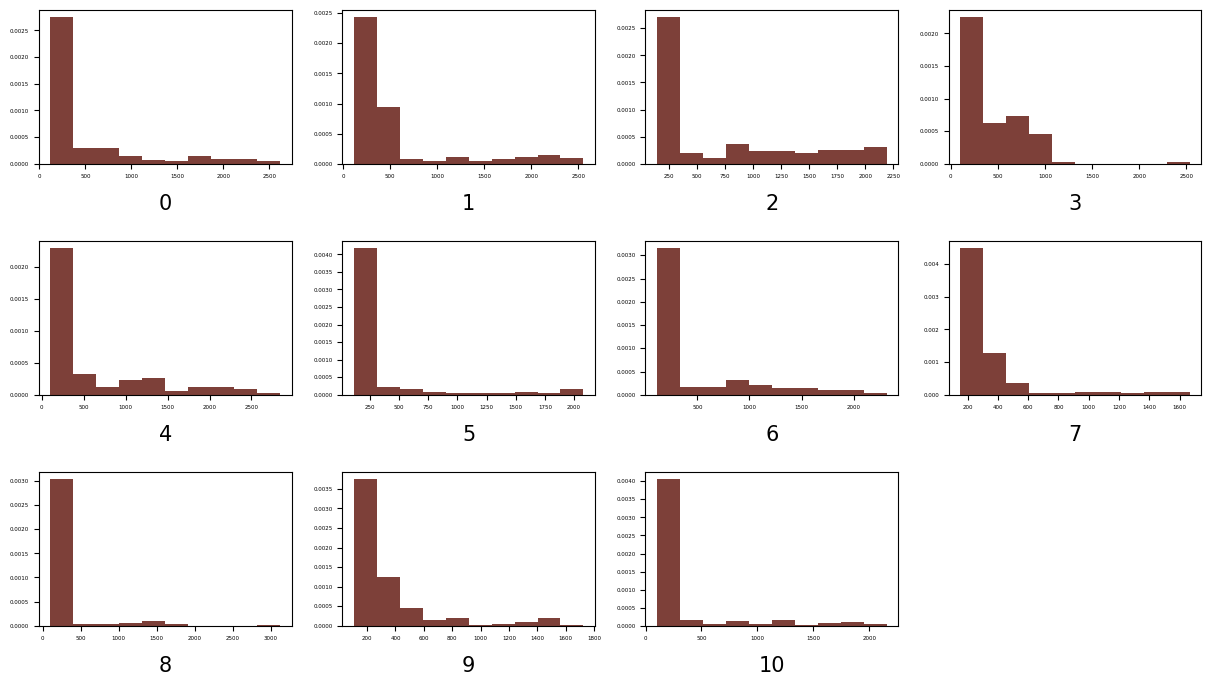

In [115]:
fig, axes = plt.subplots(3,4,figsize=(15,8))
for cluster in range(11):
    ks_statistic, p_value = ks_2samp(real[real['cluster']==cluster]['num_points'], fake[fake['cluster']==cluster]['num_points'])
    length = len(real[real['cluster']==cluster])
    print(f'cluster {cluster}: KS={round(ks_statistic,3)}, p_val={round(p_value,2)}, {length}')
    #print(f'{round(p_value,3)}')
    ax = axes.flatten()[cluster]
    ax.hist(real[real['cluster']==cluster]['num_points'],density=True,color='black')
    ax.hist(fake[fake['cluster']==cluster]['num_points'], density=True,alpha=.5,color='salmon')
    ax.tick_params(axis='both', which='major', labelsize=4)
    ax.text(0.5, -0.3, f'{cluster}', fontsize=15, color='black', ha='center', transform=ax.transAxes)
axes[2][3].axis('off')
plt.subplots_adjust(hspace=0.5)

plt.show()

## Testing for length

All clusters together.

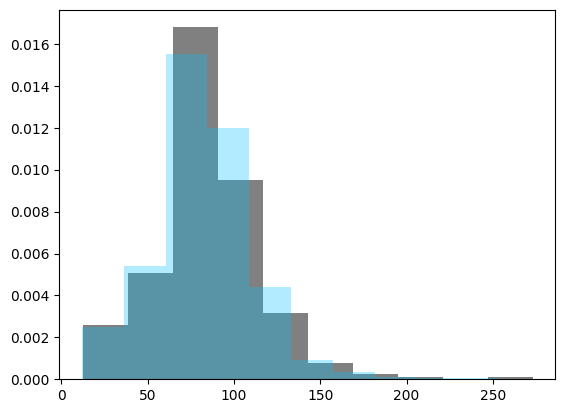

(0.03733693207377418, 0.013832175270822616)

In [116]:
fig, ax = plt.subplots()

ax.hist(real['length'],density=True, color = 'gray')
ax.hist(fake['length'], density = True, color='deepskyblue', alpha=0.3)
plt.show()
np.mean(real['length']), np.mean(fake['length'])
ks_statistic, p_value = ks_2samp(real['length'], fake['length'])
ks_statistic, p_value


cluster 0: KS=0.031, p_val=1.0, 163
cluster 1: KS=0.039, p_val=0.97, 207
cluster 2: KS=0.086, p_val=0.29, 170
cluster 3: KS=0.043, p_val=0.98, 146
cluster 4: KS=0.049, p_val=0.98, 123
cluster 5: KS=0.049, p_val=0.86, 197
cluster 6: KS=0.059, p_val=0.88, 131
cluster 7: KS=0.102, p_val=0.18, 150
cluster 8: KS=0.071, p_val=0.16, 330
cluster 9: KS=0.049, p_val=0.73, 257
cluster 10: KS=0.048, p_val=0.58, 349


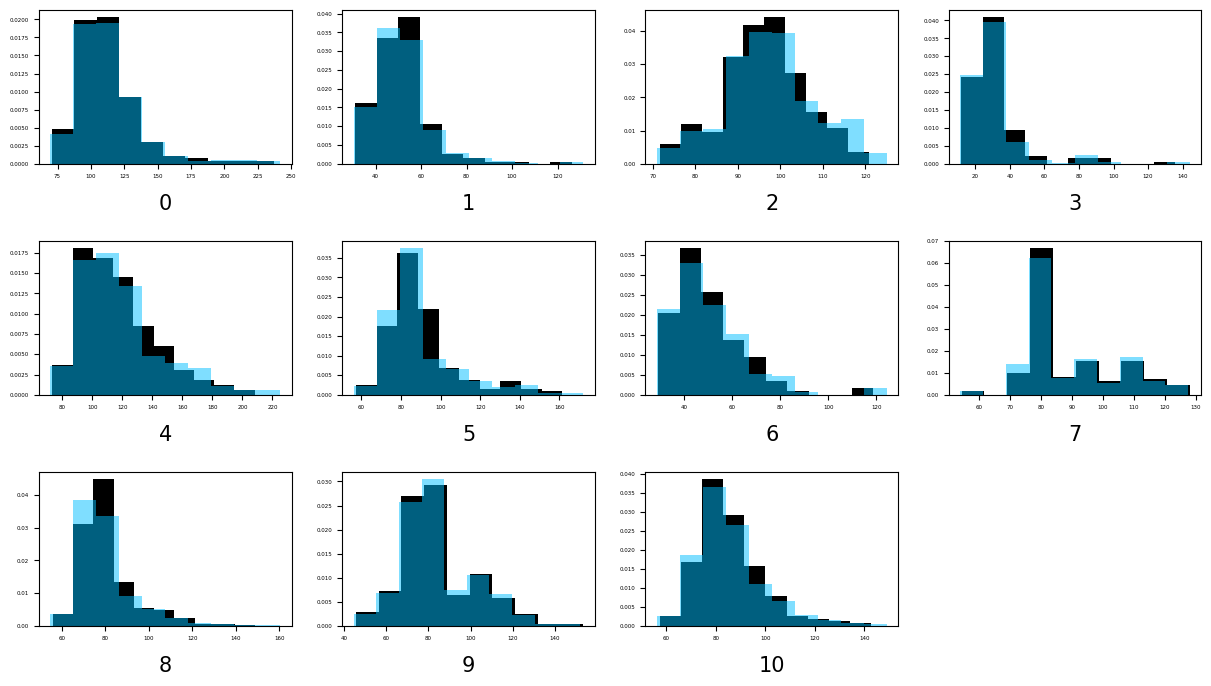

In [119]:
fig, axes = plt.subplots(3,4,figsize=(15,8))
for cluster in range(11):
    ks_statistic, p_value = ks_2samp(real[real['cluster']==cluster]['length'], fake[fake['cluster']==cluster]['length'])
    length = len(real[real['cluster']==cluster])
    print(f'cluster {cluster}: KS={round(ks_statistic,3)}, p_val={round(p_value,2)}, {length}')
    #print(f'{round(p_value,3)}')
    ax = axes.flatten()[cluster]
    ax.hist(real[real['cluster']==cluster]['length'],density=True,color='black')
    ax.hist(fake[fake['cluster']==cluster]['length'], density=True,alpha=.5,color='deepskyblue')
    ax.tick_params(axis='both', which='major', labelsize=4)
    ax.text(0.5, -0.3, f'{cluster}', fontsize=15, color='black', ha='center', transform=ax.transAxes)
axes[2][3].axis('off')
plt.subplots_adjust(hspace=0.5)

plt.show()